### Importing necessary libraries

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import matplotlib.pyplot as plt
import numpy as np

### Reading dataset (IMDB reviews dataset)

In [2]:
df=pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


### Preprocessing the text data:

In [3]:
stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(filtered_tokens)

In [4]:
reviews = df['review'].tolist()
preprocessed_reviews = [preprocess(review) for review in reviews]
preprocessed_reviews[0]

'one reviewers mentioned watching 1 oz episode hooked right exactly happened br br first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use br br called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far br br would say main appeal show due fact goes shows would dare forget pretty pictures painted mainstream audiences forget charm forget romance oz mess around first episode ever saw struck nasty surreal could say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches

### Vectorizing the text data

In [5]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(preprocessed_reviews)

### Dimensionality reduction

In [7]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

### Clustering the text

In [11]:
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)

C:\Users\omtej\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

### Visualizing the resulting clusters

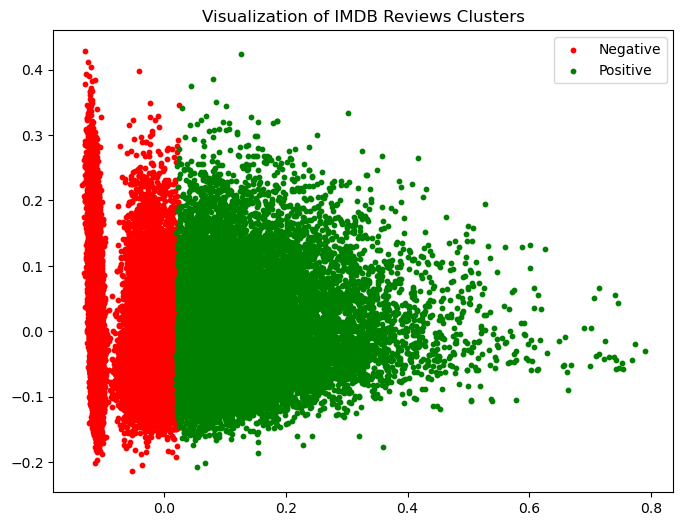

In [13]:
df['cluster'] = kmeans.labels_
pca_df = pd.DataFrame(X_pca, columns=['x', 'y'])
pca_df['cluster'] = df['cluster']
colors = ['red', 'green']
cluster_labels = ['Negative', 'Positive']

plt.figure(figsize=(8, 6))
for i in range(num_clusters):
    plt.scatter(
        pca_df[pca_df['cluster'] == i]['x'], 
        pca_df[pca_df['cluster'] == i]['y'], 
        s=10, 
        color=colors[i], 
        label=cluster_labels[i]
    )
plt.legend()
plt.title('Visualization of IMDB Reviews Clusters')
# plt.xlabel('PCA feature 1')
# plt.ylabel('PCA feature 2')
plt.show()